In [163]:
import tensorflow as tf
import os
import cv2
import imghdr

In [164]:
os.listdir('data')

['happy', 'sad']

In [165]:
data_dir= 'data'

In [166]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_34134495_M4bLtlnlfGyEk0ZwOn2fB7ul4D1vvy57.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0-1.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'EVENT-iStock_000086923645_Double-happy-people-lr-642

In [167]:
image_exts= [ 'jpeg','jpg','png','bmp']

In [168]:
img=cv2.imread(os.path.join('data','happy','35438_hd.jpg'))
img.shape


(649, 1240, 3)

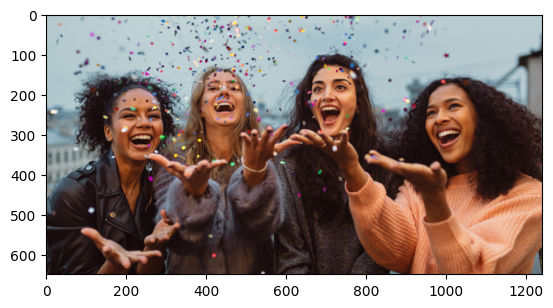

In [169]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [170]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img= cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print ('image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('issue with image {}'.format(image_path))

# Load Data:

In [171]:
import numpy as np

In [172]:
#tf.data.Dataset??

In [173]:
data= tf.keras.utils.image_dataset_from_directory('data')

Found 289 files belonging to 2 classes.


In [174]:
#tf.keras.utils.image_dataset_from_directory??

In [175]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [176]:
data_iterator= data.as_numpy_iterator()


In [177]:
batch=data_iterator.next()

In [178]:
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [179]:
batch[0].shape

(32, 256, 256, 3)

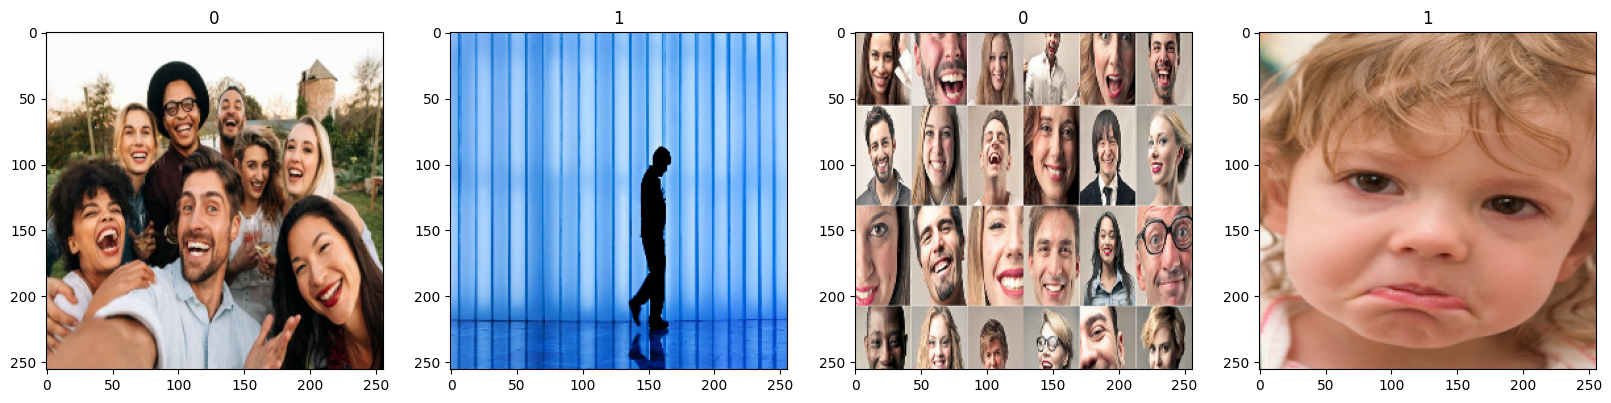

In [180]:
# 0 = happy
# 1 = sad


fig,ax= plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data:

In [181]:
data.as_numpy_iterator().next()

(array([[[[1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          ...,
          [1.39312500e+02, 8.93125000e+01, 1.83125000e+01],
          [1.36562500e+02, 8.65625000e+01, 1.39375000e+01],
          [1.35062500e+02, 8.50625000e+01, 1.20625000e+01]],
 
         [[1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          ...,
          [1.39312500e+02, 8.93125000e+01, 1.83125000e+01],
          [1.36989380e+02, 8.69893799e+01, 1.43643799e+01],
          [1.35095337e+02, 8.50953369e+01, 1.20953369e+01]],
 
         [[1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          [1.98000000e+02, 1.81000000e+02, 1.53000000e+02],
          ...,
          [1.39377808e+02, 8.93778076e+01, 1.8377

In [182]:
data.as_numpy_iterator().next()[0].max()

255.0

In [183]:
data= data.map(lambda x,y:(x/255,y))

In [184]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.06666667, 0.07058824, 0.14117648],
          [0.06666

In [185]:
data.as_numpy_iterator().next()[0].max()

1.0

# Split Data:

In [186]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [187]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

# Deep Learning Model

In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [189]:
model = Sequential()

In [190]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [191]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Train

In [195]:
logdir='logs'

In [196]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [197]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 0.9913 - accuracy: 0.5491 - val_loss: 0.5938 - val_accuracy: 0.6719
Epoch 2/20
7/7 [==============================] - 11s 1s/step - loss: 0.5955 - accuracy: 0.6473 - val_loss: 0.5971 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.5939 - accuracy: 0.6741 - val_loss: 0.6192 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.5408 - accuracy: 0.7723 - val_loss: 0.5410 - val_accuracy: 0.6719
Epoch 5/20
7/7 [==============================] - 11s 1s/step - loss: 0.4439 - accuracy: 0.7902 - val_loss: 0.3438 - val_accuracy: 0.8750
Epoch 6/20
7/7 [==============================] - 11s 1s/step - loss: 0.4776 - accuracy: 0.8125 - val_loss: 0.3510 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.4205 - accuracy: 0.7723 - val_loss: 0.3984 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

In [198]:
hist.history

{'loss': [0.991265594959259,
  0.5955488085746765,
  0.5939432978630066,
  0.5407664775848389,
  0.4439341127872467,
  0.4776436388492584,
  0.420537531375885,
  0.36164912581443787,
  0.25620535016059875,
  0.1742035448551178,
  0.12212127447128296,
  0.08734740316867828,
  0.05439068749547005,
  0.038101810961961746,
  0.03076666034758091,
  0.01656975969672203,
  0.01225745677947998,
  0.005877583287656307,
  0.007589496672153473,
  0.002036341466009617],
 'accuracy': [0.5491071343421936,
  0.6473214030265808,
  0.6741071343421936,
  0.7723214030265808,
  0.7901785969734192,
  0.8125,
  0.7723214030265808,
  0.9196428656578064,
  0.9017857313156128,
  0.9375,
  0.9732142686843872,
  0.96875,
  1.0,
  0.9955357313156128,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5937787294387817,
  0.5970990061759949,
  0.6192402839660645,
  0.5410329103469849,
  0.34376972913742065,
  0.3510178327560425,
  0.398410439491272,
  0.25950300693511963,
  0.1332283318042755,
  0.114367246

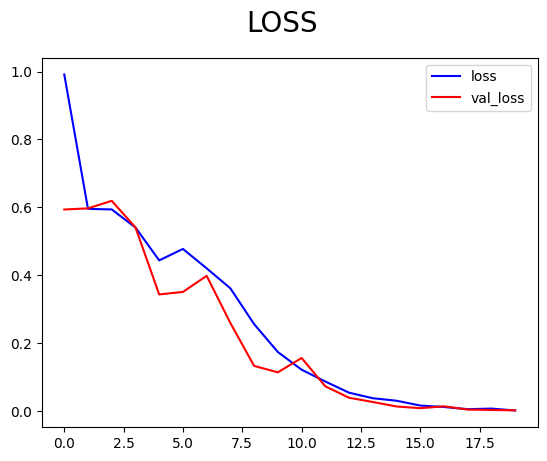

In [199]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('LOSS', fontsize=20)
plt.legend()
plt.show()

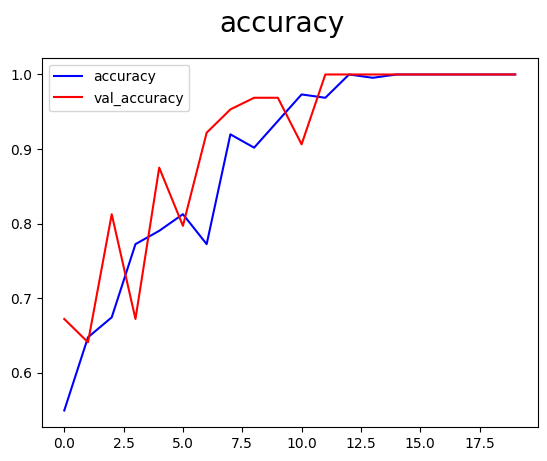

In [200]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend()
plt.show()

# Evaluate

In [202]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [203]:
pre = Precision()
re= Recall()
acc=BinaryAccuracy()

In [204]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 106ms/step


In [207]:
print(f'Precision: {pre.result()} Recall: {re.result()}  Accuracy : {acc.result()} ')

Precision: 1.0 Recall: 1.0  Accuracy : 1.0 


# Test

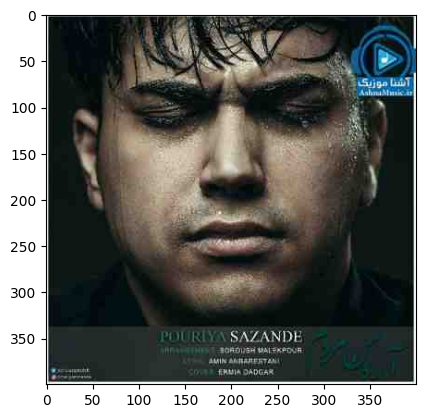

In [219]:
# Download a new image from Internet for testing model and after that do this codes: 
img=cv2.imread('sad.jpg')
# Sad.jpg is the new pic
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

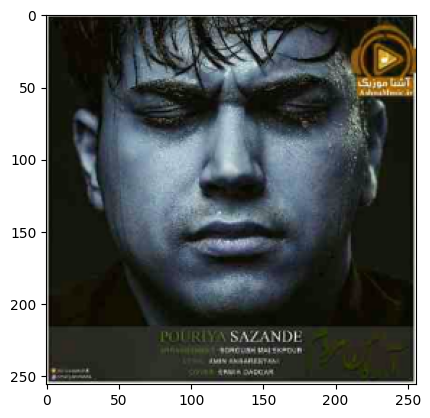

In [220]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [221]:
resize.shape

TensorShape([256, 256, 3])

In [222]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [223]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 32ms/step


In [224]:
yhat

array([[0.9988863]], dtype=float32)

In [225]:
if yhat > 0.5:
    print (' this pic is SAD :(')
else:
    print (" this pic is SOOOOOOO HAAAAAPY :)")

 this pic is SAD :(
